## 一、原理介绍

常用的数据标准化方法有最大最小归一化、均值方差标准化、小数定标法、定量特征二值化等。其中，均值方差标准化是一种将数据转化为标准正态分布的标准化方法。在回归模型中，服从正态分布的自变量和因变量往往对应着较好的回归预测效果。均值方差标准化的计算公式为： $$ x'=\frac{x-\mu }{\sigma } $$
公式中，x表示单个数据的取值，$\mu$表示对应列的均值，$\sigma$表示对应列的方差

## 二、代码实现

In [8]:
#加载模块
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore") #过滤掉警告的意思
from pyforest import *
import pandas as pd
import numpy as np

In [9]:
#读入数据
data=pd.read_csv("F:/data/data.csv",encoding='gbk') #bgk表示中文编码
#查看数据前五行
data.head()

,(1)资产负债率,(2)剔除预收款项后的资产负债率,(3)长期资本负债率,(4)长期资产适合率,(5)权益乘数
0,0.655799,0.606708,0.613865,0.494960,0.791971
1,0.752061,0.705498,0.841639,1.000000,0.932990
2,0.957391,0.941543,0.000000,0.493465,0.988630
3,0.807046,0.780709,0.984696,0.530637,0.958086
4,0.805235,0.796071,0.861480,0.541299,0.957462


In [10]:
#标准化，返回值为标准化后的数据
Standard_data=StandardScaler().fit_transform(data)
Standard_data

array([[-8.07868584e-01, -4.46781853e-01, -8.65101276e-02,
        -2.18550266e-01, -4.97556164e-01],
       [ 5.83511306e-02,  1.83702105e-01,  6.61977686e-01,
         7.51432528e+00,  3.06672601e-01],
       [ 1.90602996e+00,  1.69014811e+00, -2.10373034e+00,
        -2.41440984e-01,  6.23989972e-01],
       ...,
       [-1.14289225e-01, -1.81738238e-01, -4.01819153e-01,
        -1.78750448e-04,  2.31292440e-01],
       [-7.54465400e-01, -7.37349652e-01,  3.84582589e-01,
        -2.41868662e-01, -3.87772198e-01],
       [ 1.28886801e+00,  1.12495300e+00, -2.10373034e+00,
        -2.48967045e-01,  5.66083685e-01]])

In [11]:
#由于标准化后的数据是array格式，故将其转化为数据框
Standard_data = pd.DataFrame(Standard_data) #转为dataframe

In [12]:
#将数据写成csv文件，方便后续的建模
Standard_data.to_csv("F:/data/Standard_data.csv",index=False) 

下面验证标准化后的数据是否服从正态分布，这里以第一列数据为例

In [19]:
#为标准化后的数据加上列名
Standard_data.columns=data.columns
Standard_data.head()

,(1)资产负债率,(2)剔除预收款项后的资产负债率,(3)长期资本负债率,(4)长期资产适合率,(5)权益乘数
0,-0.807869,-0.446782,-0.086510,-0.218550,-0.497556
1,0.058351,0.183702,0.661978,7.514325,0.306673
2,1.906030,1.690148,-2.103730,-0.241441,0.623990
3,0.553135,0.663697,1.132078,0.327724,0.449795
4,0.536841,0.761739,0.727179,0.490969,0.446237


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

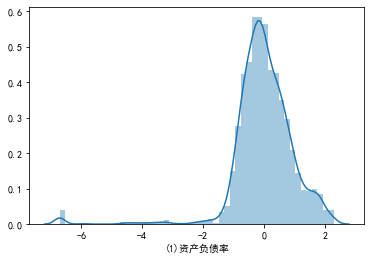

In [21]:
#绘制概率密度图，用于展示数据分布
plt.rcParams['font.sans-serif']=['SimHei'] #图片显示中文
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码
sns.distplot(Standard_data['(1)资产负债率'])
plt.show()

从概率密度图中可以看出，标准化后的数据对称分布在0的两侧，接近于正态分布。